# Armut - Association Rule Based Recommender System

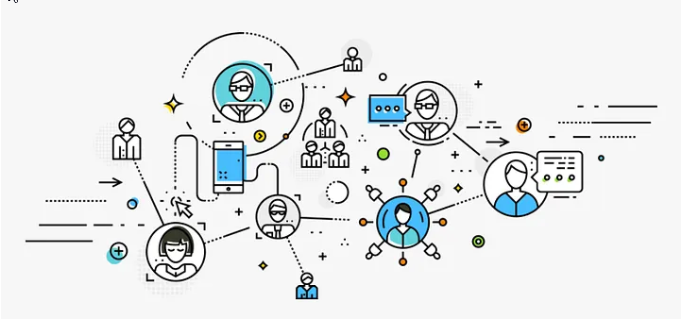


 It is a rule-based machine learning technique used to find patterns in data. The Apriori Algorithm is used while the Association Rule Learning takes place. Apriori is a basket analysis method used to reveal product associations. There are 3 significant metrics in Apriori

**Support:** Measures how often products X and Y are purchased together
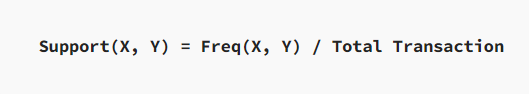

**Confidence:** Probability of purchasing product Y when product X is purchased
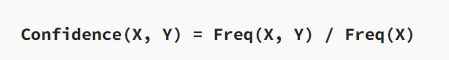

**Lift:** The coefficient of increase in the probability of purchasing product Y when product X is purchased.
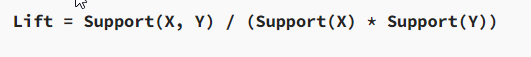



**How does the Apriori work?**

The Apriori algorithm calculates possible product pairs according to the support threshold value determined at the beginning of the process and creates the final table by making eliminations according to the support value determined in each iteration.

# Dataset

The dataset consists of services purchased by customers and their categories.
Each service includes the date and time of purchase.

**UserId:** Customer number

**ServiceId:** Anonymized services corresponding to different categories. (For example: ServiceId 4 can represent upholstery cleaning service under the "Cleaning" category and furniture assembly service under the "Furniture" category).

**CategoryId:** Anonymized categories. (For example: Categories such as Cleaning, Moving, Renovation)

**CreateDate:** The date when the service was purchased.

In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
# çıktının tek bir satırda olmasını sağlar.
pd.set_option('display.expand_frame_repr', False)
from mlxtend.frequent_patterns import apriori, association_rules

df_ = pd.read_csv("armut_data.csv")
df = df_.copy()
df.head()

,UserId,ServiceId,CategoryId,CreateDate
0,25446,4,5,2017-08-06 16:11:00
1,22948,48,5,2017-08-06 16:12:00
2,10618,0,8,2017-08-06 16:13:00
3,7256,9,4,2017-08-06 16:14:00
4,25446,48,5,2017-08-06 16:16:00


The "ServiceID" represents a different service within each "CategoryID." We are creating a new variable by combining "ServiceID" and "CategoryID" with an underscore to represent the services.

In [33]:
df["HizmetID"]=df['ServiceId'].astype(str) + '_' + df['CategoryId'].astype(str)

The dataset consists of the dates and times when services are received, and there are no basket definitions (e.g., invoices, etc.). To apply Association Rule Learning, it is necessary to create a basket definition, where the basket definition represents the services each customer receives monthly. For example, customer with ID 7256 has one basket for the services they received in August 2017, which includes 9_4 and 46_4 services, and another basket for the services they received in October 2017, which includes 9_4 and 38_4 services. These baskets need to be uniquely identified with an ID.

To achieve this, first create a new date variable that contains only the year and month. Then, concatenate the UserID with the newly created date variable using an underscore, and assign it to a new variable called ID.

In [34]:
df['CreateDate'] = pd.to_datetime(df['CreateDate'])
df['New_Date'] = df['CreateDate'].dt.strftime('%Y-%m')
df["SepetID"] = df['UserId'].astype(str) + '_' + df['New_Date'].astype(str)
df.head()

,UserId,ServiceId,CategoryId,CreateDate,HizmetID,New_Date,SepetID
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08,25446_2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08,22948_2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08,10618_2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08,7256_2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08,25446_2017-08


In [35]:
df=df.pivot_table(index='SepetID', columns='HizmetID', values='CategoryId', aggfunc='count')
df = df.applymap(lambda x: 1 if x > 0 else x)
df=df.fillna(0)
df_pvt=df.copy()
df_pvt.head()
# for example ; "0_8" = cleaning service

HizmetID,0_8,10_9,11_11,12_7,13_11,14_7,15_1,16_8,17_5,18_4,19_6,1_4,20_5,21_5,22_0,23_10,24_10,25_0,26_7,27_7,28_4,29_0,2_0,30_2,31_6,32_4,33_4,34_6,35_11,36_1,37_0,38_4,39_10,3_5,40_8,41_3,42_1,43_2,44_0,45_6,46_4,47_7,48_5,49_1,4_5,5_11,6_7,7_3,8_5,9_4
SepetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0_2017-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_2017-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0_2018-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0_2018-04,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000_2017-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Apriori Algorithm

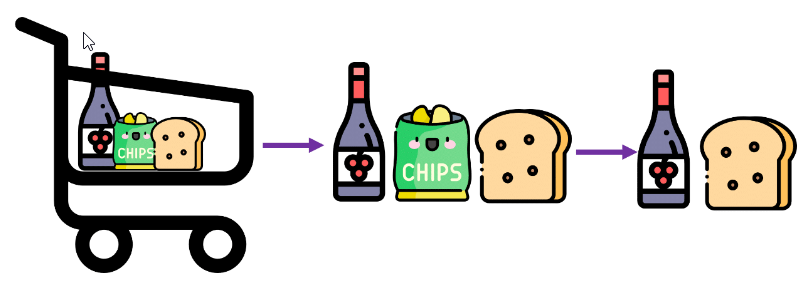

In [37]:
frequent_itemsets = apriori(df_pvt, 
                            min_support=0.01, #threshhold 
                            use_colnames=True)
frequent_itemsets.sort_values("support", ascending=False).head()

C:\Users\oktay\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
8,0.238121,(18_4)
19,0.130286,(2_0)
5,0.120963,(15_1)
39,0.067762,(49_1)
28,0.066568,(38_4)


**This means that the probability of purchasing the service with code 18_4 is 0.238121.**

In [40]:
rules = association_rules(frequent_itemsets,
                          metric="support",
                          min_threshold=0.01)
print(rules)
#rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)]

   antecedents consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
0        (2_0)     (13_11)            0.130286            0.056627  0.012819    0.098394  1.737574  0.005442    1.046325       0.488074
1      (13_11)       (2_0)            0.056627            0.130286  0.012819    0.226382  1.737574  0.005442    1.124216       0.449965
2        (2_0)      (15_1)            0.130286            0.120963  0.033951    0.260588  2.154278  0.018191    1.188833       0.616073
3       (15_1)       (2_0)            0.120963            0.130286  0.033951    0.280673  2.154278  0.018191    1.209066       0.609539
4       (33_4)      (15_1)            0.027310            0.120963  0.011233    0.411311  3.400299  0.007929    1.493211       0.725728
5       (15_1)      (33_4)            0.120963            0.027310  0.011233    0.092861  3.400299  0.007929    1.072262       0.803047
6       (38_4)      (15_1)            0.066568  

**Antecedent** = The first product

**Consequents**= The subsequent product

**Antecedent support** = The probability of the first product being observed

**Consequent support** = The probability of the subsequent product being observed

**Support** = The probability of both products being purchased together

**Confidence**= The probability of the second product being purchased when the first product is purchased

**Lift** = The probability of the second product being purchased increases n-fold when the first product is purchased.

These terms are commonly used in association rule mining to analyze patterns in data, particularly in the context of market basket analysis.

In [41]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

In [43]:
arl_recommender(rules,'2_0',1)

['22_0']

# Result

**So, according to our analysis, when a service with code 2_0 is purchased on armut.com, the subsequent service that is purchased is a product with the code 22_0.**